In [69]:
from gensim.models import Word2Vec, FastText

from word_vectorizer import WordVectorizer

In [70]:
vectorizer = WordVectorizer(pretrained=True)

In [71]:
vectorizer.load_data(size_mb=1000)

In [72]:
vectorizer.tokenize(tokenizer='spacy', batch_size=500, caps=False)

In [73]:
vectorizer.train(vectorizer='word2vec', model_type='skipgram', vector_size=300, window=10, min_count=5, workers=16, save=True)

Model in ./models/word2vec/w2v_sg_300_win10_spacy_cat_gc_1000mb.model already exists. Loaded model.


In [95]:
vectorizer.wv.most_similar('cotxe', topn=5)

[('vehicle', 0.8086808323860168),
 ('moto', 0.681359589099884),
 ('furgoneta', 0.6770114302635193),
 ('cotxes', 0.6697468757629395),
 ('camió', 0.6431754231452942)]

In [75]:
# Evaluate the model
eval_path = './data/wordsim353.en.ca.txt' if not vectorizer.caps else './data/wordsim353.en.ca_caps.txt'
vectorizer.wv.evaluate_word_pairs(eval_path, encoding='utf-8')

(PearsonRResult(statistic=0.569319294879368, pvalue=3.9847519381558227e-20),
 SignificanceResult(statistic=0.5995045783868934, pvalue=1.1585238989249155e-22),
 1.3574660633484164)

In [76]:
# Vocabulary for t-SNE
sports = [
	'futbol',
	'tenis', 
	'hoquei',
	'rugbi',
	'atletisme',
	'ciclisme',
	'basquet',
	'handbol',
	'volei',
	'esquí'
]

politics = [
	'parlament',
	'govern',
	'president',
	'alcalde',
	'política',
	'eleccions',
	'partit',
	'democràcia'
]

economy = [
	'economia',
	'empresa',
	'mercat',
	'comerç',
	'indústria',
	'finances',
	'negoci',
	'capital',
	'consum',
	'vendes'
]

nature = [
	'muntanya',
	'riu',
	'arbres',
	'flors',
	'paisatge',
	'pedra',
	'pirineus'
]

tech = [
	'ordinador',
	'programari',
	'software',
	'hardware',
	'mòbil',
	'xarxa',
	'internet',
	'informàtica',
	'ciberseguretat',
	'ciberatac',
	'dades',
	'bigdata',
	'digital'
]

music = [
	'piano',
	'guitarra',
	'violí',
	'trompeta',
	'orquestra',
	'concert',
	'òpera',
	'flauta',
]

food = [
	'pizza',
	'hamburguesa',
	'pasta',
	'paella',
	'carn',
	'amanida',
	'canelons',
	'postres',
	'gelat',
	'arròs',
]

animals = [
	'gos',
	'gat',
	'elefant',
	'girafa',
	'hipopòtam',
	'ocell',
	'lleó',
	'ratolí',
	'tigre',
	'cavall',
	'vaca',
	'gallina'
]

In [77]:
# Vocabulary for t-SNE
# sports + politics + economy + nature + tech + music + food + animals
tsne_vocabulary = sports + politics + nature + tech + food
# tsne_vocabulary = ['rei', 'reina', 'home', 'dona', 'gat', 'gata']

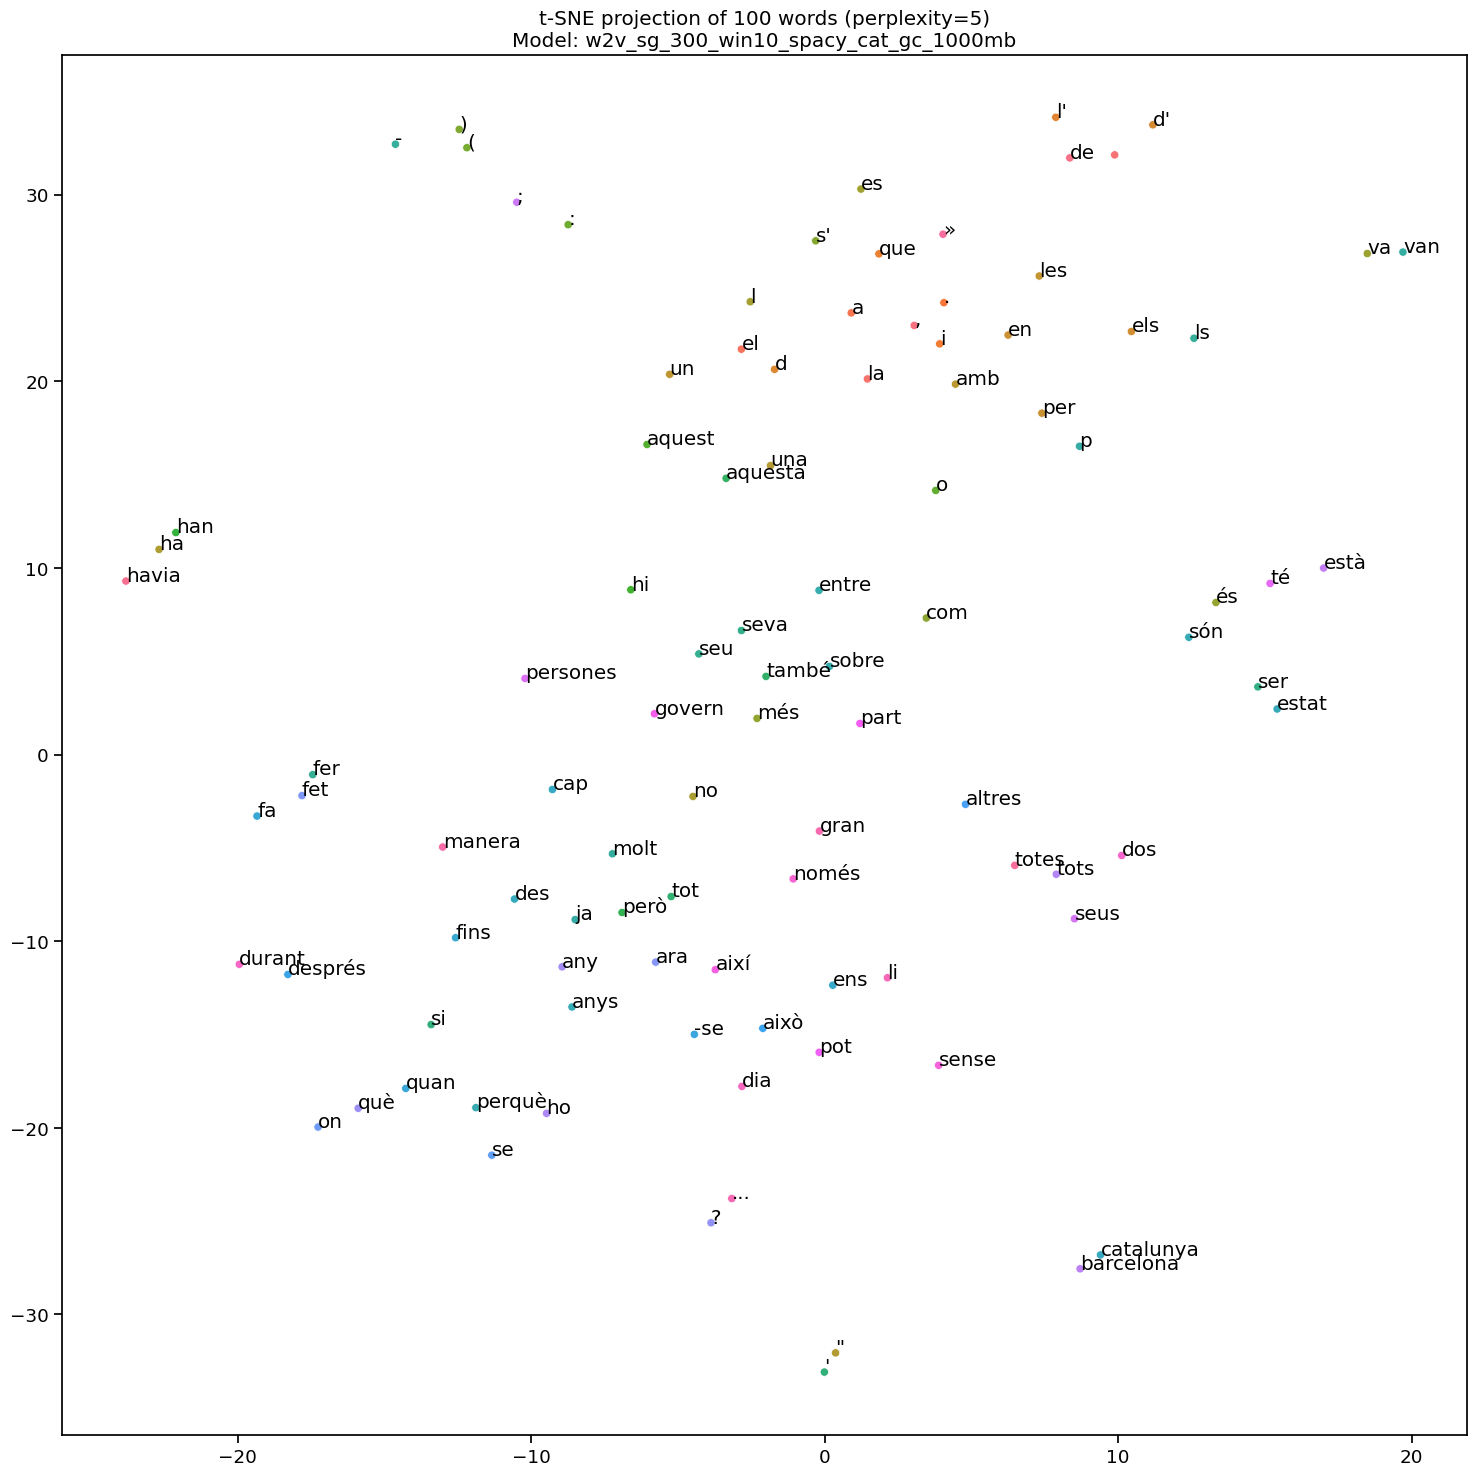

In [78]:
vectorizer.tsne(vocabulary=[], num_words=100, perplexity=5, save=True)